### Project Tasks
1.	Using the attached dataset (train.csv) analyse the data and visualize the most important aspects using your preferred method. Furthermore, share three ideas on how to increase the % of Partners that accept. Document your steps where needed. 
2.	Predict the reaction of a partner rider to an order: is a rider most likely to ignore, decline or accept the dispatch they receive? Use train.csv to train your model and test.csv to predict the missing value (‘target’). Please document your steps and method used. The csv “SubmissionExample” will help with  the format. 


In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import seaborn as sns
%matplotlib inline
%matplotlib inline
warnings.filterwarnings("ignore")
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
import ppscore


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_train=pd.read_csv('train.csv')
df_train.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,96531,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,103546,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    179867 non-null  object 
 1   order_id              179867 non-null  int64  
 2   dispatch_day          179867 non-null  int64  
 3   dispatch_day_of_week  179867 non-null  int64  
 4   dispatch_time         179867 non-null  object 
 5   client_id             179867 non-null  int64  
 6   client_type           179867 non-null  object 
 7   order_license_status  179867 non-null  int64  
 8   order_carrier_type    179867 non-null  int64  
 9   vendor_type           179867 non-null  object 
 10  rider_id              179867 non-null  int64  
 11  rider_license_status  179867 non-null  int64  
 12  rider_carrier_type    179867 non-null  int64  
 13  rider_amount          179867 non-null  int64  
 14  rider_lat             179867 non-null  float64
 15  

In [5]:
df_train.shape

(179867, 21)

In [6]:
df_test=pd.read_csv('test.csv')
df_test.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240
1,ID_7MPWFJ9XFI,60465,11,4,17:10:03,2378775,Personal,1,2,Bike,106329,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558
2,ID_5VVT3Q3M5B,25249,30,3,12:02:01,2121681,Personal,0,2,Bike,90551,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860
3,ID_C2GTVS1H7K,21224,27,2,11:10:32,38801,Business,0,2,Bike,90482,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921
4,ID_0YGC8V3PFT,58287,14,6,16:12:55,153111,Business,0,2,Bike,101959,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76791 entries, 0 to 76790
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    76791 non-null  object 
 1   order_id              76791 non-null  int64  
 2   dispatch_day          76791 non-null  int64  
 3   dispatch_day_of_week  76791 non-null  int64  
 4   dispatch_time         76791 non-null  object 
 5   client_id             76791 non-null  int64  
 6   client_type           76791 non-null  object 
 7   order_license_status  76791 non-null  int64  
 8   order_carrier_type    76791 non-null  int64  
 9   vendor_type           76791 non-null  object 
 10  rider_id              76791 non-null  int64  
 11  rider_license_status  76791 non-null  int64  
 12  rider_carrier_type    76791 non-null  int64  
 13  rider_amount          76791 non-null  int64  
 14  rider_lat             76791 non-null  float64
 15  rider_long         

In [8]:
df_test.shape

(76791, 20)

In [9]:
df_riders=pd.read_csv('Riders.csv')
df_riders.head()

,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [10]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rider ID                2632 non-null   int64  
 1   Active Rider Age        2632 non-null   int64  
 2   Average Partner Rating  2632 non-null   float64
 3   Number of Ratings       2632 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 82.4 KB


In [11]:
df_submissionexample=pd.read_csv('SubmissionExample.csv')
df_submissionexample.head()

,ID,target
0,ID_3B4D2Q2DSI,0
1,ID_7MPWFJ9XFI,0
2,ID_5VVT3Q3M5B,0
3,ID_C2GTVS1H7K,0
4,ID_0YGC8V3PFT,0


In [12]:
df_submissionexample.shape

(76791, 2)

In [13]:
df_train_combined=pd.merge(df_train, df_riders,
                  right_on="Rider ID", left_on="rider_id")
df_train_combined.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.0,1
1,ID_H0AUXCXGFC,24790,24,6,12:01:25,75647,Business,0,1,Bike,30153,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,30153,11,10.0,1
2,ID_MJ5ZL07728,58733,9,4,16:12:19,75647,Business,0,1,Bike,30153,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,30153,11,10.0,1
3,ID_DWE8TVBGRA,45577,11,2,14:12:27,593630,Business,0,2,Bike,30153,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,30153,11,10.0,1
4,ID_NHSCII54BG,16556,4,5,11:01:09,593630,Business,0,2,Bike,30153,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,30153,11,10.0,1


In [14]:
df=df_train_combined.copy()

In [15]:
df_test_combined=pd.merge(df_test, df_riders,
                  right_on="Rider ID", left_on="rider_id")
df_test_combined.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,57224,175,23.04,15
1,ID_GNX24MLKHO,30101,15,3,12:11:22,593630,Business,0,2,Bike,57224,1,1,560,-42.887284,-17.237053,-42.887562,-17.231009,-42.810029,-17.284056,57224,175,23.04,15
2,ID_PJ5FDNIOB3,19690,21,6,11:09:10,142163,Business,0,2,Bike,57224,1,1,500,-42.822009,-17.259028,-42.820792,-17.265436,-42.766476,-17.260854,57224,175,23.04,15
3,ID_EMW71WZ4BI,15836,29,5,10:12:59,59363,Business,0,2,Bike,57224,1,1,1280,-42.878566,-17.257949,-42.873245,-17.245775,-42.762261,-17.289664,57224,175,23.04,15
4,ID_UEE9UX7ED5,43618,6,2,14:10:09,2405455,Personal,0,2,Bike,57224,1,1,720,-42.880657,-17.224284,-42.877853,-17.227971,-42.797415,-17.299456,57224,175,23.04,15


In [16]:
df2=df_test_combined.copy()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76791 entries, 0 to 76790
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      76791 non-null  object 
 1   order_id                76791 non-null  int64  
 2   dispatch_day            76791 non-null  int64  
 3   dispatch_day_of_week    76791 non-null  int64  
 4   dispatch_time           76791 non-null  object 
 5   client_id               76791 non-null  int64  
 6   client_type             76791 non-null  object 
 7   order_license_status    76791 non-null  int64  
 8   order_carrier_type      76791 non-null  int64  
 9   vendor_type             76791 non-null  object 
 10  rider_id                76791 non-null  int64  
 11  rider_license_status    76791 non-null  int64  
 12  rider_carrier_type      76791 non-null  int64  
 13  rider_amount            76791 non-null  int64  
 14  rider_lat               76791 non-null

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179867 entries, 0 to 179866
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      179867 non-null  object 
 1   order_id                179867 non-null  int64  
 2   dispatch_day            179867 non-null  int64  
 3   dispatch_day_of_week    179867 non-null  int64  
 4   dispatch_time           179867 non-null  object 
 5   client_id               179867 non-null  int64  
 6   client_type             179867 non-null  object 
 7   order_license_status    179867 non-null  int64  
 8   order_carrier_type      179867 non-null  int64  
 9   vendor_type             179867 non-null  object 
 10  rider_id                179867 non-null  int64  
 11  rider_license_status    179867 non-null  int64  
 12  rider_carrier_type      179867 non-null  int64  
 13  rider_amount            179867 non-null  int64  
 14  rider_lat           

In [19]:
import matplotlib.pyplot as ax

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [21]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [22]:
'''
Get a general overview of a dataframe.
:parameter
    :param dtf: dataframe - input data
    :param max_cat: num - mininum number of recognize column type
'''
def dtf_overview(dtf, max_cat=20, figsize=(10,5)):
    ## recognize column type
    dic_cols = {col:utils_recognize_type(dtf, col, max_cat=max_cat) for col in dtf.columns}
        
    ## print info
    len_dtf = len(dtf)
    print("Shape:", dtf.shape)
    print("-----------------")
    for col in dtf.columns:
        info = col+" --> Type:"+dic_cols[col]
        info = info+" | Nas: "+str(dtf[col].isna().sum())+"("+str(int(dtf[col].isna().mean()*100))+"%)"
        if dic_cols[col] == "cat":
            info = info+" | Categories: "+str(dtf[col].nunique())
        else:
            info = info+" | Min-Max: "+"({x})-({y})".format(x=str(int(dtf[col].min())), y=str(int(dtf[col].max())))
        if dtf[col].nunique() == len_dtf:
            info = info+" | Possible PK"
        print(info)
                
    ## plot heatmap
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = dtf.isnull()
    for k,v in dic_cols.items():
        if v == "num":
            heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
        else:
            heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
    sns.heatmap(heatmap, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Dataset Overview')
    #plt.setp(plt.xticks()[1], rotation=0)
    plt.show()
    
    ## add legend
    print("\033[1;37;40m Categerocial \033[m", "\033[1;30;41m Numerical \033[m", "\033[1;30;47m NaN \033[m")

Shape: (179867, 25)
-----------------
ID --> Type:cat | Nas: 0(0%) | Categories: 179867 | Possible PK
order_id --> Type:num | Nas: 0(0%) | Min-Max: (100)-(64427)
dispatch_day --> Type:num | Nas: 0(0%) | Min-Max: (1)-(31)
dispatch_day_of_week --> Type:cat | Nas: 0(0%) | Categories: 7
dispatch_time --> Type:cat | Nas: 0(0%) | Categories: 5636
client_id --> Type:num | Nas: 0(0%) | Min-Max: (261)-(2568456)
client_type --> Type:cat | Nas: 0(0%) | Categories: 2
order_license_status --> Type:cat | Nas: 0(0%) | Categories: 2
order_carrier_type --> Type:cat | Nas: 0(0%) | Categories: 3
vendor_type --> Type:cat | Nas: 0(0%) | Categories: 1
rider_id --> Type:num | Nas: 0(0%) | Min-Max: (1817)-(123694)
rider_license_status --> Type:cat | Nas: 0(0%) | Categories: 2
rider_carrier_type --> Type:cat | Nas: 0(0%) | Categories: 2
rider_amount --> Type:num | Nas: 0(0%) | Min-Max: (200)-(2190)
rider_lat --> Type:num | Nas: 0(0%) | Min-Max: (-45)-(-40)
rider_long --> Type:num | Nas: 0(0%) | Min-Max: (-20)-

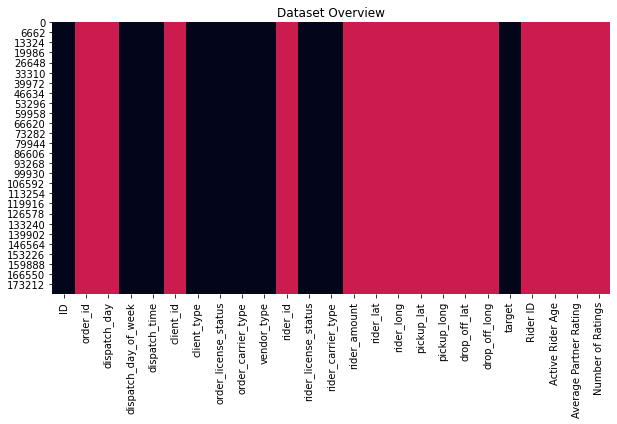

 Categerocial   Numerical   NaN 


In [23]:
dtf_overview(df, max_cat=20, figsize=(10,5))

Shape: (76791, 24)
-----------------
ID --> Type:cat | Nas: 0(0%) | Categories: 76791 | Possible PK
order_id --> Type:num | Nas: 0(0%) | Min-Max: (102)-(64425)
dispatch_day --> Type:num | Nas: 0(0%) | Min-Max: (1)-(31)
dispatch_day_of_week --> Type:cat | Nas: 0(0%) | Categories: 7
dispatch_time --> Type:cat | Nas: 0(0%) | Categories: 5273
client_id --> Type:num | Nas: 0(0%) | Min-Max: (261)-(2568456)
client_type --> Type:cat | Nas: 0(0%) | Categories: 2
order_license_status --> Type:cat | Nas: 0(0%) | Categories: 2
order_carrier_type --> Type:cat | Nas: 0(0%) | Categories: 3
vendor_type --> Type:cat | Nas: 0(0%) | Categories: 1
rider_id --> Type:num | Nas: 0(0%) | Min-Max: (1035)-(123257)
rider_license_status --> Type:cat | Nas: 0(0%) | Categories: 2
rider_carrier_type --> Type:cat | Nas: 0(0%) | Categories: 2
rider_amount --> Type:num | Nas: 0(0%) | Min-Max: (200)-(2190)
rider_lat --> Type:num | Nas: 0(0%) | Min-Max: (-45)-(-40)
rider_long --> Type:num | Nas: 0(0%) | Min-Max: (-20)-(-

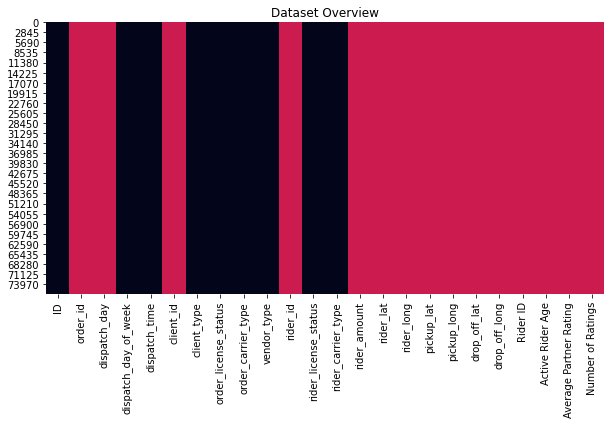

 Categerocial   Numerical   NaN 


In [24]:
dtf_overview(df2, max_cat=20, figsize=(10,5))

In [25]:
y = "target"

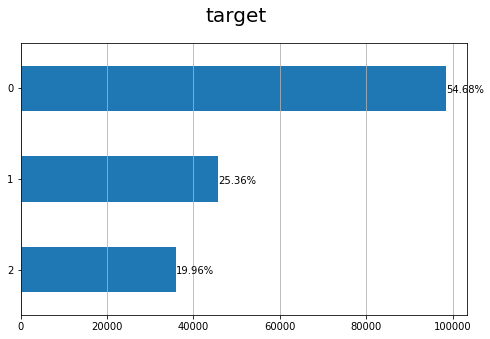

In [26]:
ax = df['target'].value_counts().sort_values().plot(kind="barh",figsize=(8,5))
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

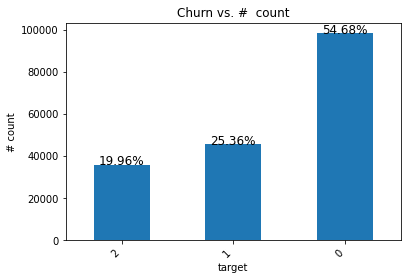

In [27]:
#ax = sns.barplot(df['Churn'].value_counts().sort_values())
ax = df['target'].value_counts().sort_values().plot(kind="bar")
ax.set(xlabel='target', ylabel='# count', title='Churn vs. #  count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
totals= []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches: # loop to all objects and plot group wise % distribution
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
plt.show()

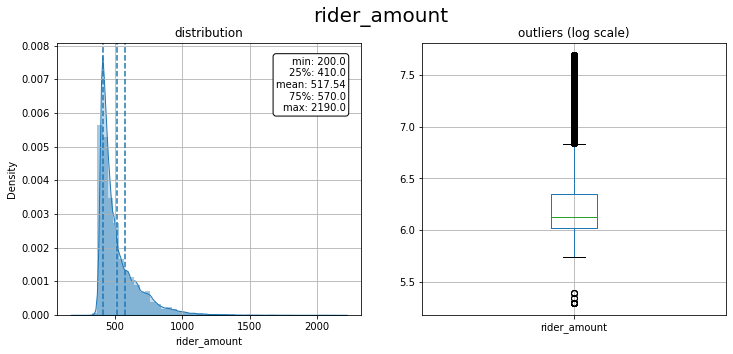

In [28]:
x = "rider_amount"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(x, fontsize=20)

### distribution

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
plt.show()

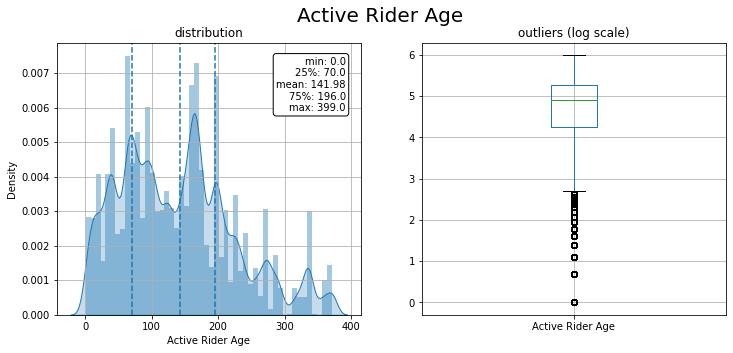

In [29]:
x = "Active Rider Age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(x, fontsize=20)

### distribution

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
plt.show()

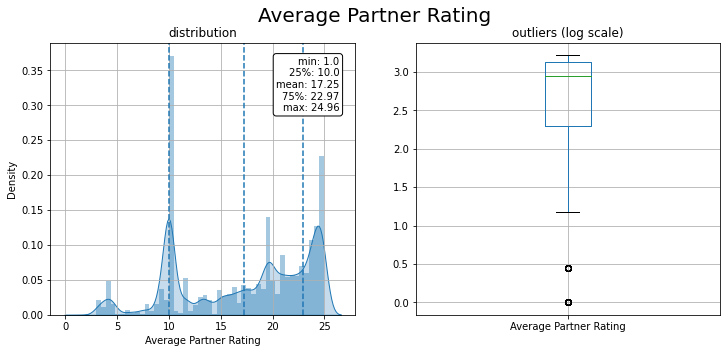

In [30]:

x = "Average Partner Rating"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(12,5))
fig.suptitle(x, fontsize=20)

### distribution

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
plt.show()

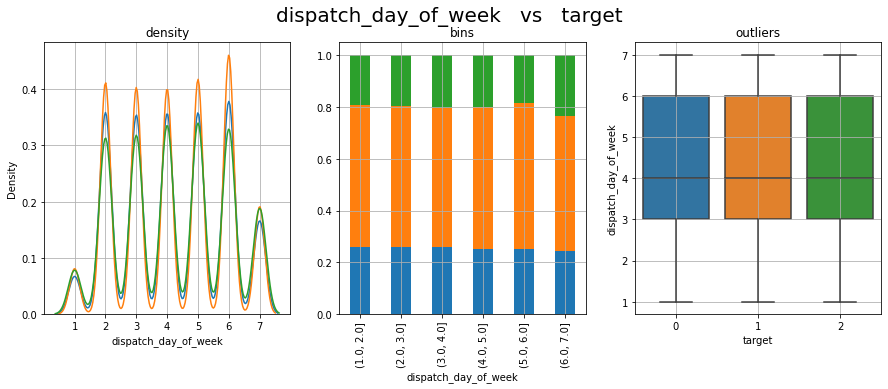

In [31]:
x = "dispatch_day_of_week"
cat, num = "target", "dispatch_day_of_week"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[2])
ax[2].grid(True)
plt.show()

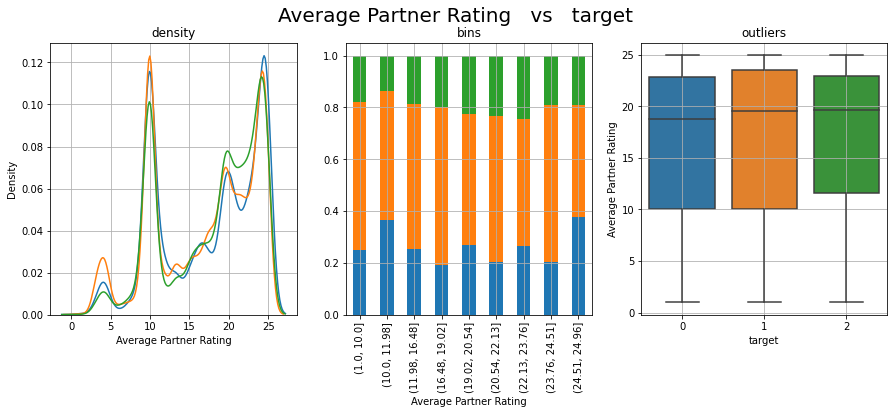

In [32]:
x = "Average Partner Rating"
cat, num = "target", "Average Partner Rating"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[2])
ax[2].grid(True)
plt.show()

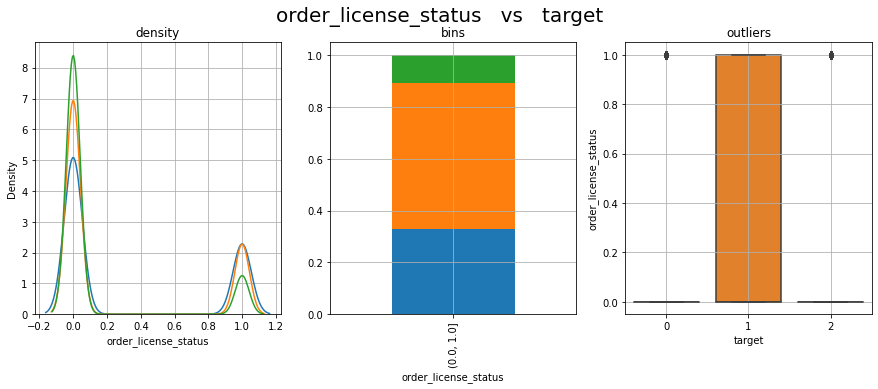

In [33]:
x = "order_license_status"
cat, num = "target", "order_license_status"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[2])
ax[2].grid(True)
plt.show()

ValueError: could not convert string to float: 'Business'

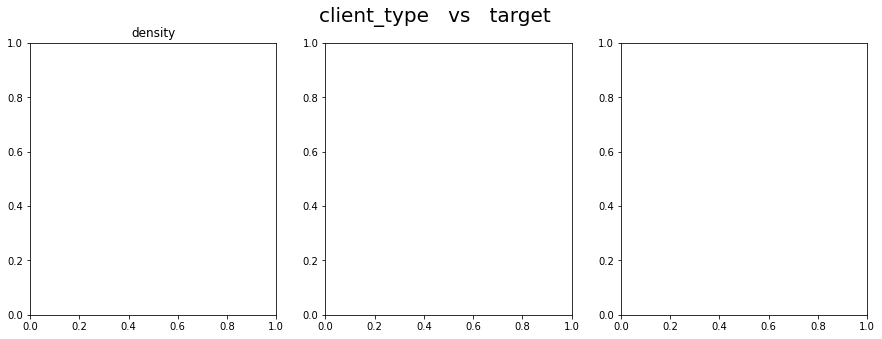

In [34]:
x = "client_type"
cat, num = "target", "client_type"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[2])
ax[2].grid(True)
plt.show()

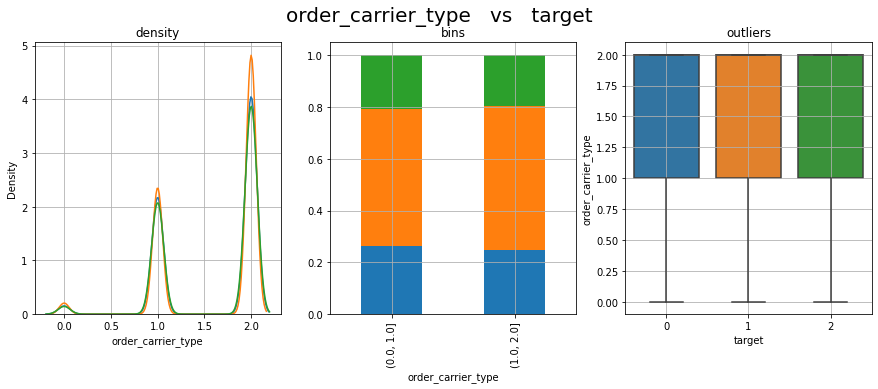

In [35]:
x = "order_carrier_type"
cat, num = "target", "order_carrier_type"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[2])
ax[2].grid(True)
plt.show()

<AxesSubplot:xlabel='Average Partner Rating', ylabel='rider_amount'>

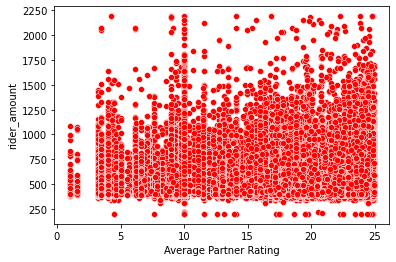

In [36]:
sns.scatterplot(df["Average Partner Rating"],df["rider_amount"], color='r')

Text(0.5, 1.0, 'Average Partner Rating vs target (filter: dispatch_day_of_week) ')

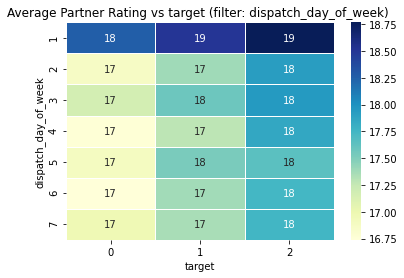

In [37]:
## Plot contingency table
cont_table = pd.crosstab(index=df["dispatch_day_of_week"], 
             columns=df["target"], values=df["Average Partner Rating"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Average Partner Rating vs target (filter: dispatch_day_of_week) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: rider_license_status) ')

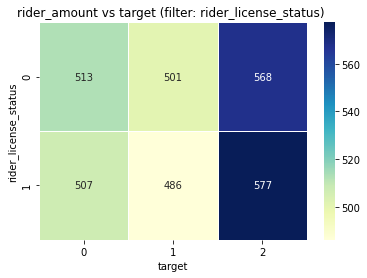

In [38]:
## Plot contingency table
cont_table = pd.crosstab(index=df["rider_license_status"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: rider_license_status) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: order_carrier_type) ')

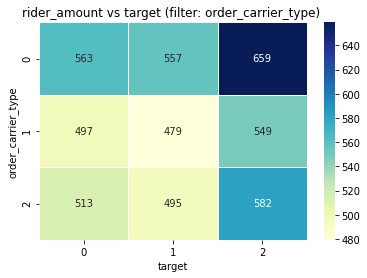

In [39]:
## Plot contingency table
cont_table = pd.crosstab(index=df["order_carrier_type"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: order_carrier_type) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: client_type) ')

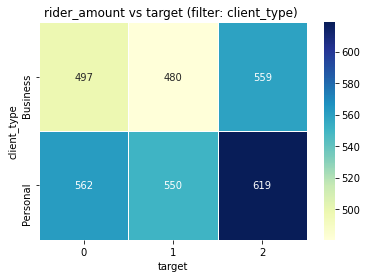

In [40]:
## Plot contingency table
cont_table = pd.crosstab(index=df["client_type"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: client_type) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: vendor_type) ')

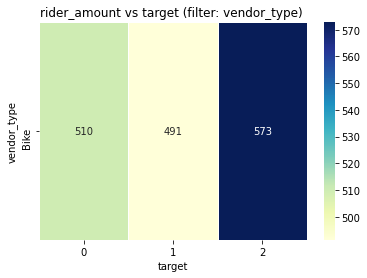

In [41]:
## Plot contingency table
cont_table = pd.crosstab(index=df["vendor_type"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: vendor_type) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: order_license_status) ')

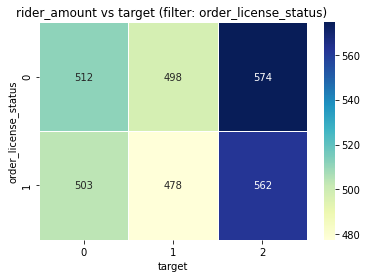

In [42]:
## Plot contingency table
cont_table = pd.crosstab(index=df["order_license_status"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: order_license_status) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: dispatch_day_of_week) ')

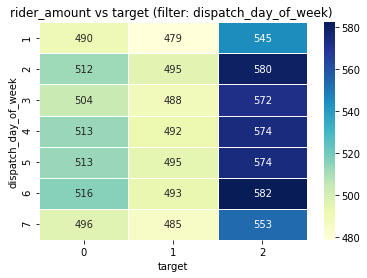

In [43]:
## Plot contingency table
cont_table = pd.crosstab(index=df["dispatch_day_of_week"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: dispatch_day_of_week) ' )

Text(0.5, 1.0, 'rider_amount vs target (filter: dispatch_day) ')

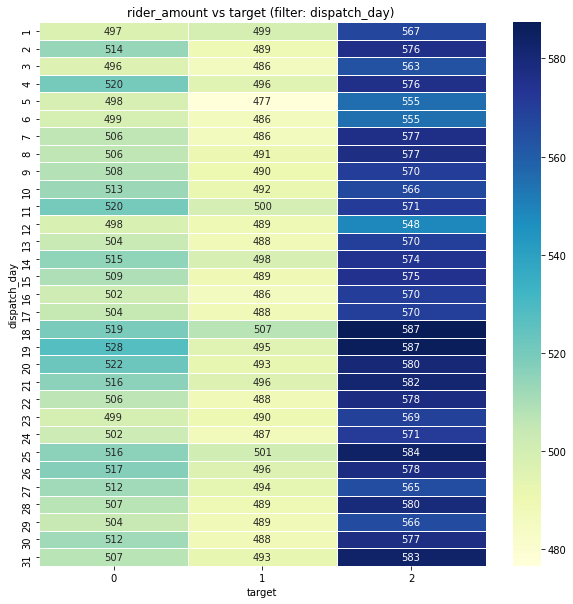

In [44]:
## Plot contingency table
fig, ax = plt.subplots(figsize=(10,10)) 
cont_table = pd.crosstab(index=df["dispatch_day"], 
             columns=df["target"], values=df["rider_amount"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'rider_amount vs target (filter: dispatch_day) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: rider_license_status ) ')

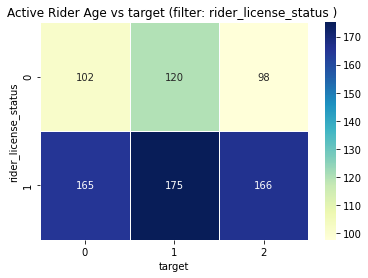

In [45]:
## Plot contingency table
cont_table = pd.crosstab(index=df["rider_license_status"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: rider_license_status ) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: order_carrier_type) ')

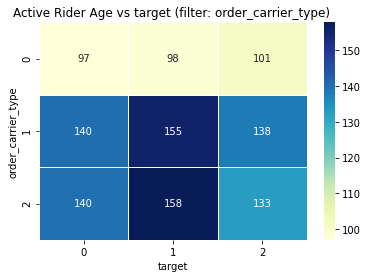

In [46]:
## Plot contingency table
cont_table = pd.crosstab(index=df["order_carrier_type"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: order_carrier_type) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: client_type) ')

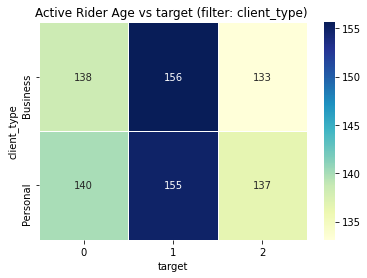

In [47]:
## Plot contingency table
cont_table = pd.crosstab(index=df["client_type"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: client_type) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: client_type) ')

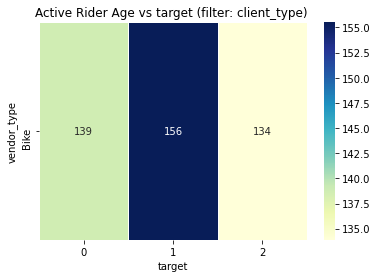

In [48]:
## Plot contingency table
cont_table = pd.crosstab(index=df["vendor_type"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: client_type) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: order_license_status) ')

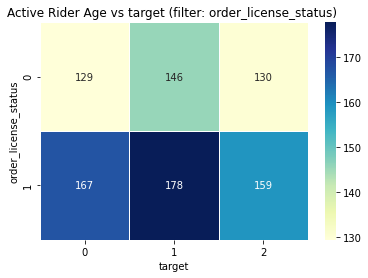

In [49]:
## Plot contingency table
cont_table = pd.crosstab(index=df["order_license_status"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: order_license_status) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: dispatch_day_of_week) ')

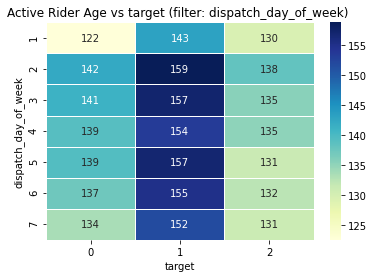

In [50]:
## Plot contingency table
cont_table = pd.crosstab(index=df["dispatch_day_of_week"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: dispatch_day_of_week) ' )

Text(0.5, 1.0, 'Active Rider Age vs target (filter: dispatch_day) ')

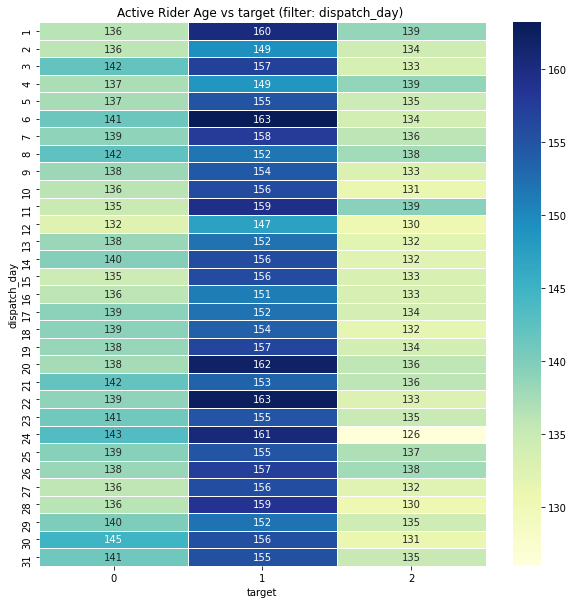

In [51]:
## Plot contingency table
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10)) 
cont_table = pd.crosstab(index=df["dispatch_day"], 
             columns=df["target"], values=df["Active Rider Age"], aggfunc="mean")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Active Rider Age vs target (filter: dispatch_day) ' )

In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [53]:
# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['longitude'], app_df['latitude'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()

NameError: name 'app_df' is not defined

In [54]:
df2['dispatch_time1'] = pd.to_datetime(df2.dispatch_time)

In [55]:
df2['hour'] = df2.dispatch_time1.dt.hour
df2.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_time1,hour
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,57224,175,23.04,15,2022-04-18 12:10:59,12
1,ID_GNX24MLKHO,30101,15,3,12:11:22,593630,Business,0,2,Bike,57224,1,1,560,-42.887284,-17.237053,-42.887562,-17.231009,-42.810029,-17.284056,57224,175,23.04,15,2022-04-18 12:11:22,12
2,ID_PJ5FDNIOB3,19690,21,6,11:09:10,142163,Business,0,2,Bike,57224,1,1,500,-42.822009,-17.259028,-42.820792,-17.265436,-42.766476,-17.260854,57224,175,23.04,15,2022-04-18 11:09:10,11
3,ID_EMW71WZ4BI,15836,29,5,10:12:59,59363,Business,0,2,Bike,57224,1,1,1280,-42.878566,-17.257949,-42.873245,-17.245775,-42.762261,-17.289664,57224,175,23.04,15,2022-04-18 10:12:59,10
4,ID_UEE9UX7ED5,43618,6,2,14:10:09,2405455,Personal,0,2,Bike,57224,1,1,720,-42.880657,-17.224284,-42.877853,-17.227971,-42.797415,-17.299456,57224,175,23.04,15,2022-04-18 14:10:09,14


In [56]:
# daypart function
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"

In [57]:
# utilize it along with apply method
df2['dayparts'] = df2['hour'].apply(daypart)

In [58]:
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.0,1
1,ID_H0AUXCXGFC,24790,24,6,12:01:25,75647,Business,0,1,Bike,30153,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,30153,11,10.0,1
2,ID_MJ5ZL07728,58733,9,4,16:12:19,75647,Business,0,1,Bike,30153,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,30153,11,10.0,1
3,ID_DWE8TVBGRA,45577,11,2,14:12:27,593630,Business,0,2,Bike,30153,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,30153,11,10.0,1
4,ID_NHSCII54BG,16556,4,5,11:01:09,593630,Business,0,2,Bike,30153,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,30153,11,10.0,1


In [59]:
df['dispatch_time1'] = pd.to_datetime(df.dispatch_time)


In [60]:
df['hour'] = df.dispatch_time1.dt.hour
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_time1,hour
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.0,1,2022-04-18 09:02:54,9
1,ID_H0AUXCXGFC,24790,24,6,12:01:25,75647,Business,0,1,Bike,30153,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,30153,11,10.0,1,2022-04-18 12:01:25,12
2,ID_MJ5ZL07728,58733,9,4,16:12:19,75647,Business,0,1,Bike,30153,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,30153,11,10.0,1,2022-04-18 16:12:19,16
3,ID_DWE8TVBGRA,45577,11,2,14:12:27,593630,Business,0,2,Bike,30153,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,30153,11,10.0,1,2022-04-18 14:12:27,14
4,ID_NHSCII54BG,16556,4,5,11:01:09,593630,Business,0,2,Bike,30153,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,30153,11,10.0,1,2022-04-18 11:01:09,11


In [61]:
# daypart function
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"

In [62]:
# utilize it along with apply method
df['dayparts'] = df['hour'].apply(daypart)

In [63]:


# one hot encoding
#df= pd.get_dummies(df['dayparts'])
# re-arrange columns for convenience
#df= df[['dawn','morning','noon','afternoon','evening','midnight']]
#display data
#df.head()

In [64]:
features=['ID','dispatch_day','dispatch_day_of_week','client_type','order_license_status','order_carrier_type',
          'rider_license_status','rider_carrier_type','rider_amount','rider_lat','rider_long','pickup_lat','pickup_long',
          'drop_off_lat','Active Rider Age','Average Partner Rating','Number of Ratings','dayparts']

In [65]:
features1=['ID','dispatch_day','dispatch_day_of_week','client_type','order_license_status','order_carrier_type',
          'rider_license_status','rider_carrier_type','rider_amount','Active Rider Age','Average Partner Rating',
          'Number of Ratings','dayparts']

In [66]:
drop = ['order_id','dispatch_time','client_id','rider_id','Rider ID','dispatch_time1','hour','vendor_type']
#setting index for the datatframe
df_ml = df.set_index('ID').drop(drop, axis=1).copy()
df_ml.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,,
ID_UN7YV8HKL2,10,3,Business,1,2,1,1,490,-42.808800,-17.300803,-42.827339,-17.278738,-42.786354,-17.281385,0,134,23.63,36,noon
ID_6RN2SWBNXL,10,3,Business,0,2,1,1,390,-42.787338,-17.241327,-42.787833,-17.257167,-42.802757,-17.257437,1,168,24.77,88,afternoon
ID_Y68938HNI0,8,3,Business,0,1,0,1,430,-42.790857,-17.299956,-42.790707,-17.297892,-42.836784,-17.318949,0,162,23.20,49,noon
ID_09NG2VKLO6,27,7,Business,0,0,0,0,870,-42.867204,-17.332891,-42.869817,-17.332326,-42.781014,-17.287953,2,231,19.65,60,noon
ID_USRYCXZL3D,11,2,Business,0,2,0,1,530,-42.790888,-17.255587,-42.787833,-17.257167,-42.703583,-17.255979,2,224,24.51,61,afternoon


In [67]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179867 entries, ID_SCUW21PVAU to ID_71VCXT1TGZ
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dispatch_day            179867 non-null  int64  
 1   dispatch_day_of_week    179867 non-null  int64  
 2   client_type             179867 non-null  object 
 3   order_license_status    179867 non-null  int64  
 4   order_carrier_type      179867 non-null  int64  
 5   rider_license_status    179867 non-null  int64  
 6   rider_carrier_type      179867 non-null  int64  
 7   rider_amount            179867 non-null  int64  
 8   rider_lat               179867 non-null  float64
 9   rider_long              179867 non-null  float64
 10  pickup_lat              179867 non-null  float64
 11  pickup_long             179867 non-null  float64
 12  drop_off_lat            179867 non-null  float64
 13  drop_off_long           179867 non-null  float64
 14  target

In [68]:
df_ml_2=df_ml.copy()

In [69]:
df_ml_2.head()

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,,
ID_SCUW21PVAU,27,6,Business,0,2,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11,10.0,1,morning
ID_H0AUXCXGFC,24,6,Business,0,1,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,11,10.0,1,noon
ID_MJ5ZL07728,9,4,Business,0,1,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,11,10.0,1,afternoon
ID_DWE8TVBGRA,11,2,Business,0,2,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,11,10.0,1,afternoon
ID_NHSCII54BG,4,5,Business,0,2,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,11,10.0,1,noon


In [70]:
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
df_ml_2['client_type'] = LabelEncoder().fit_transform(df_ml_2['client_type'])
df_ml_2['client_type'] = LabelEncoder().fit_transform(df_ml_2['client_type'])
# transform the dataset
df_ml_2['client_type'].value_counts()
df_ml_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179867 entries, ID_SCUW21PVAU to ID_71VCXT1TGZ
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dispatch_day            179867 non-null  int64  
 1   dispatch_day_of_week    179867 non-null  int64  
 2   client_type             179867 non-null  int64  
 3   order_license_status    179867 non-null  int64  
 4   order_carrier_type      179867 non-null  int64  
 5   rider_license_status    179867 non-null  int64  
 6   rider_carrier_type      179867 non-null  int64  
 7   rider_amount            179867 non-null  int64  
 8   rider_lat               179867 non-null  float64
 9   rider_long              179867 non-null  float64
 10  pickup_lat              179867 non-null  float64
 11  pickup_long             179867 non-null  float64
 12  drop_off_lat            179867 non-null  float64
 13  drop_off_long           179867 non-null  float64
 14  target

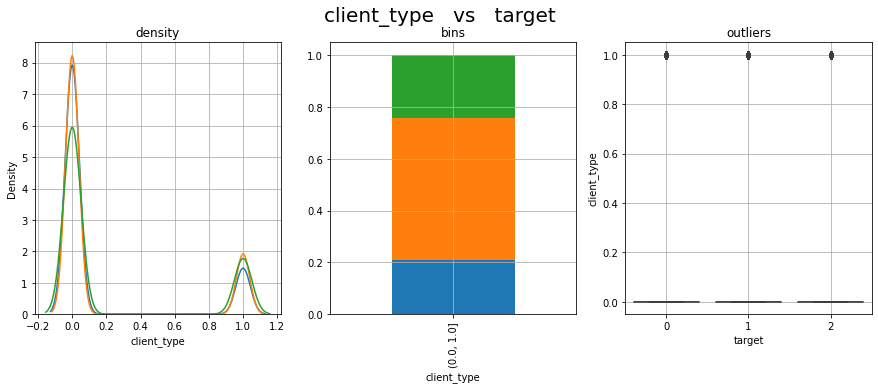

In [71]:
x = "client_type"
cat, num = "target", "client_type"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df_ml_2[cat].unique():
    sns.distplot(df_ml_2[df_ml_2[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df_ml_2[num], q=np.linspace(0,1,11))
tmp = df_ml_2.groupby([cat, pd.cut(df_ml_2[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df_ml_2[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df_ml_2, ax=ax[2])
ax[2].grid(True)
plt.show()

In [72]:
drop = ['order_id','dispatch_time','client_id','rider_id','Rider ID','dispatch_time1','hour','vendor_type']
#setting index for the datatframe
df_ml2 = df2.set_index('ID').drop(drop, axis=1).copy()
df_ml2.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,
ID_O55CHTK2JX,8,5,Business,1,2,1,1,530,-42.841760,-17.280113,-42.825562,-17.281467,-42.880476,-17.230240,41,19.64,103,afternoon
ID_Y8K24JR56S,19,4,Business,0,1,1,1,580,-42.819418,-17.276151,-42.827513,-17.299970,-42.729927,-17.278560,399,14.97,214,noon
ID_XSNXIX6ZJ0,2,4,Business,1,2,1,1,490,-42.864967,-17.271713,-42.831520,-17.268960,-42.830589,-17.283552,203,21.44,65,morning
ID_8Y8CQNQW1Q,20,2,Business,1,2,1,1,460,-42.824396,-17.277045,-42.825031,-17.282770,-42.823374,-17.288237,175,22.88,348,noon
ID_G4PY6E3A8N,13,6,Business,0,1,0,1,640,-42.829290,-17.340854,-42.836784,-17.318949,-42.813347,-17.236697,154,10.00,22,morning


In [73]:
df_ml2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76791 entries, ID_3B4D2Q2DSI to ID_KNMX8XV5H2
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dispatch_day            76791 non-null  int64  
 1   dispatch_day_of_week    76791 non-null  int64  
 2   client_type             76791 non-null  object 
 3   order_license_status    76791 non-null  int64  
 4   order_carrier_type      76791 non-null  int64  
 5   rider_license_status    76791 non-null  int64  
 6   rider_carrier_type      76791 non-null  int64  
 7   rider_amount            76791 non-null  int64  
 8   rider_lat               76791 non-null  float64
 9   rider_long              76791 non-null  float64
 10  pickup_lat              76791 non-null  float64
 11  pickup_long             76791 non-null  float64
 12  drop_off_lat            76791 non-null  float64
 13  drop_off_long           76791 non-null  float64
 14  Active Rider Age       

In [74]:
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(1 ,"Monday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(2 ,"Tuesday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(3 ,"Wednesday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(4 ,"Thursday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(5 ,"Friday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(6 ,"Saturday")
df_ml["dispatch_day_of_week"]=df_ml["dispatch_day_of_week"].replace(7 ,"Sunday")
df_ml.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,,
ID_VZNXIDRW1Z,24,Wednesday,Personal,0,1,1,1,600,-42.827394,-17.295274,-42.819037,-17.311661,-42.873147,-17.272540,2,259,24.66,59,afternoon
ID_PXBU1Q6LE3,16,Sunday,Business,0,0,0,0,390,-42.810027,-17.269955,-42.804228,-17.259004,-42.790851,-17.253310,0,107,10.00,8,evening
ID_YNQUP2XFOW,2,Saturday,Business,0,2,0,1,1160,-42.828653,-17.262088,-42.820792,-17.265436,-42.680547,-17.247042,2,196,3.43,61,afternoon
ID_4IGNW2W3LU,21,Saturday,Business,0,0,0,0,650,-42.872331,-17.289891,-42.871279,-17.319630,-42.759024,-17.298931,0,34,9.33,249,noon
ID_L075I2LD5X,3,Monday,Business,0,2,0,1,390,-42.790965,-17.265087,-42.772344,-17.277988,-42.759319,-17.289579,1,19,15.17,57,afternoon


In [75]:
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(1 ,"Monday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(2 ,"Tuesday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(3 ,"Wednesday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(4 ,"Thursday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(5 ,"Friday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(6 ,"Saturday")
df_ml2["dispatch_day_of_week"]=df_ml2["dispatch_day_of_week"].replace(7 ,"Sunday")
df_ml2.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,
ID_R43E30P9QJ,7,Thursday,Business,0,2,0,1,480,-42.792231,-17.201907,-42.806627,-17.228379,-42.832223,-17.276382,61,22.56,8,noon
ID_KYYRQ6BZ8D,29,Thursday,Personal,0,2,0,0,390,-42.801026,-17.287751,-42.791526,-17.288615,-42.772809,-17.288484,29,7.09,17,afternoon
ID_ZDOYFNPDV4,23,Tuesday,Business,0,2,0,0,400,-42.778732,-17.256755,-42.779153,-17.257836,-42.772532,-17.272792,128,10.00,11,afternoon
ID_UVH6NC4V76,29,Monday,Personal,0,2,1,0,450,-42.781220,-17.295804,-42.772771,-17.287613,-42.790944,-17.282357,88,10.00,1,afternoon
ID_78XA0YSFS0,20,Sunday,Business,1,2,1,1,460,-42.837286,-17.279180,-42.822131,-17.282880,-42.764626,-17.296068,231,24.40,33,noon


In [76]:
df_ml['order_carrier_type']=df_ml['order_carrier_type'].replace(0 ,"No_Box_option")
df_ml['order_carrier_type']=df_ml['order_carrier_type'].replace(1 ,"Box_option")
df_ml['order_carrier_type']=df_ml['order_carrier_type'].replace(2 ,"Any_option")
df_ml.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,,
ID_GEDCX0DSIH,10,Tuesday,Business,1,Any_option,1,1,400,-42.845010,-17.273235,-42.829814,-17.282189,-42.794526,-17.252723,0,189,21.78,3,morning
ID_7H0I9R16N5,24,Wednesday,Business,0,No_Box_option,0,0,670,-42.772348,-17.274540,-42.774890,-17.298009,-42.704762,-17.272421,2,80,10.00,16,noon
ID_K5PO0ZCDX5,26,Thursday,Business,0,Box_option,0,1,390,-42.831555,-17.341823,-42.843473,-17.318976,-42.882855,-17.321796,0,117,18.78,6,evening
ID_YJUIQUDSG4,30,Wednesday,Personal,0,Any_option,1,1,970,-42.772707,-17.305797,-42.774822,-17.298110,-43.002307,-17.180664,2,158,23.68,15,morning
ID_AEIX995IIM,20,Tuesday,Personal,0,Any_option,0,0,650,-42.859442,-17.310177,-42.854694,-17.324896,-42.798153,-17.273123,0,231,19.65,60,afternoon


In [77]:
df_ml2['order_carrier_type']=df_ml2['order_carrier_type'].replace(0 ,"No_Box_option")
df_ml2['order_carrier_type']=df_ml2['order_carrier_type'].replace(1 ,"Box_option")
df_ml2['order_carrier_type']=df_ml2['order_carrier_type'].replace(2 ,"Any_option")
df_ml2.sample(5)

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Active Rider Age,Average Partner Rating,Number of Ratings,dayparts
ID,,,,,,,,,,,,,,,,,,
ID_ERO3KVY701,18,Tuesday,Personal,0,Box_option,1,1,510,-42.774812,-17.237258,-42.758700,-17.245468,-42.778414,-17.257398,210,23.49,13,noon
ID_7H9ALMDI86,17,Saturday,Personal,0,Any_option,1,1,510,-42.788428,-17.299119,-42.789101,-17.298655,-42.820842,-17.264787,224,19.66,244,noon
ID_F3FZV4O0AA,16,Sunday,Business,0,Box_option,1,1,430,-42.809249,-17.297979,-42.827513,-17.299970,-42.784023,-17.262237,104,24.53,63,morning
ID_JH2YB53YDV,16,Thursday,Business,0,Box_option,1,1,440,-42.832578,-17.317984,-42.836056,-17.318111,-42.828517,-17.302052,161,10.00,7,afternoon
ID_ZPJGUG1VBE,28,Thursday,Business,0,Box_option,1,1,400,-42.786521,-17.264225,-42.794970,-17.267668,-42.765086,-17.277638,41,19.64,103,afternoon


In [78]:
df_ml2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76791 entries, ID_3B4D2Q2DSI to ID_KNMX8XV5H2
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dispatch_day            76791 non-null  int64  
 1   dispatch_day_of_week    76791 non-null  object 
 2   client_type             76791 non-null  object 
 3   order_license_status    76791 non-null  int64  
 4   order_carrier_type      76791 non-null  object 
 5   rider_license_status    76791 non-null  int64  
 6   rider_carrier_type      76791 non-null  int64  
 7   rider_amount            76791 non-null  int64  
 8   rider_lat               76791 non-null  float64
 9   rider_long              76791 non-null  float64
 10  pickup_lat              76791 non-null  float64
 11  pickup_long             76791 non-null  float64
 12  drop_off_lat            76791 non-null  float64
 13  drop_off_long           76791 non-null  float64
 14  Active Rider Age       

In [79]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179867 entries, ID_SCUW21PVAU to ID_71VCXT1TGZ
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dispatch_day            179867 non-null  int64  
 1   dispatch_day_of_week    179867 non-null  object 
 2   client_type             179867 non-null  object 
 3   order_license_status    179867 non-null  int64  
 4   order_carrier_type      179867 non-null  object 
 5   rider_license_status    179867 non-null  int64  
 6   rider_carrier_type      179867 non-null  int64  
 7   rider_amount            179867 non-null  int64  
 8   rider_lat               179867 non-null  float64
 9   rider_long              179867 non-null  float64
 10  pickup_lat              179867 non-null  float64
 11  pickup_long             179867 non-null  float64
 12  drop_off_lat            179867 non-null  float64
 13  drop_off_long           179867 non-null  float64
 14  target

In [80]:
#spliting the data into categorical and numerical data
num=df_ml.select_dtypes(include=['int64', 'float']).columns
cat=df_ml.select_dtypes(include=['object']).columns

In [81]:
#spliting the data into categorical and numerical data
num2=df_ml2.select_dtypes(include=['int64', 'float']).columns
cat2=df_ml2.select_dtypes(include=['object']).columns

In [82]:
#viewing categorical variables
X_cat = df_ml[cat]
X_cat.sample(5)

,dispatch_day_of_week,client_type,order_carrier_type,dayparts
ID,,,,
ID_EZB44B4QLK,Friday,Personal,Any_option,noon
ID_CFWFGMO3EC,Tuesday,Business,Any_option,noon
ID_EYJVD55YGP,Wednesday,Business,Any_option,noon
ID_LZB45NAK4H,Saturday,Personal,Any_option,noon
ID_BT8L6BJAUM,Sunday,Business,Box_option,noon


In [83]:
#viewing categorical variables
X_cat2 = df_ml2[cat]
X_cat2.sample(5)

,dispatch_day_of_week,client_type,order_carrier_type,dayparts
ID,,,,
ID_OO7XWBD167,Thursday,Business,Any_option,noon
ID_47D287BVCA,Tuesday,Business,Box_option,noon
ID_E4WE4NRTT6,Thursday,Business,Box_option,noon
ID_TIKU2INFR7,Thursday,Business,Box_option,afternoon
ID_3ED7Y1UV9Y,Saturday,Business,Any_option,afternoon


In [84]:
X_cat1 = pd.get_dummies(X_cat, drop_first=True)

In [85]:
X_cat1

,dispatch_day_of_week_Monday,dispatch_day_of_week_Saturday,dispatch_day_of_week_Sunday,dispatch_day_of_week_Thursday,dispatch_day_of_week_Tuesday,dispatch_day_of_week_Wednesday,client_type_Personal,order_carrier_type_Box_option,order_carrier_type_No_Box_option,dayparts_dawn,dayparts_evening,dayparts_midnight,dayparts_morning,dayparts_noon
ID,,,,,,,,,,,,,,
ID_SCUW21PVAU,0,1,0,0,0,0,0,0,0,0,0,0,1,0
ID_H0AUXCXGFC,0,1,0,0,0,0,0,1,0,0,0,0,0,1
ID_MJ5ZL07728,0,0,0,1,0,0,0,1,0,0,0,0,0,0
ID_DWE8TVBGRA,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ID_NHSCII54BG,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_F6VO1NYGBF,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ID_2L4W2O8X12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ID_ZGI3JV9SXZ,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [86]:
X_cat22 = pd.get_dummies(X_cat2, drop_first=True)
X_cat22.head()

,dispatch_day_of_week_Monday,dispatch_day_of_week_Saturday,dispatch_day_of_week_Sunday,dispatch_day_of_week_Thursday,dispatch_day_of_week_Tuesday,dispatch_day_of_week_Wednesday,client_type_Personal,order_carrier_type_Box_option,order_carrier_type_No_Box_option,dayparts_dawn,dayparts_evening,dayparts_midnight,dayparts_morning,dayparts_noon
ID,,,,,,,,,,,,,,
ID_3B4D2Q2DSI,0,1,0,0,0,0,0,0,0,0,0,0,0,1
ID_GNX24MLKHO,0,0,0,0,0,1,0,0,0,0,0,0,0,1
ID_PJ5FDNIOB3,0,1,0,0,0,0,0,0,0,0,0,0,0,1
ID_EMW71WZ4BI,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ID_UEE9UX7ED5,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [87]:
#viewing numerical variables columns
x_num=df_ml[num]

In [88]:
x_num

,dispatch_day,order_license_status,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings
ID,,,,,,,,,,,,,,,
ID_SCUW21PVAU,27,0,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11,10.00,1
ID_H0AUXCXGFC,24,0,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,11,10.00,1
ID_MJ5ZL07728,9,0,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,11,10.00,1
ID_DWE8TVBGRA,11,0,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,11,10.00,1
ID_NHSCII54BG,4,0,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,11,10.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_F6VO1NYGBF,4,0,0,0,420,-42.967298,-16.404053,-42.950809,-16.418142,-43.000383,-16.465906,2,25,11.11,3
ID_2L4W2O8X12,19,0,0,0,500,-45.681433,-20.046441,-45.688004,-20.047525,-45.747403,-19.976526,2,3,10.00,2
ID_ZGI3JV9SXZ,18,0,0,0,630,-42.786907,-17.290951,-42.777560,-17.288307,-42.824023,-17.273434,1,4,10.00,7


In [89]:
#viewing numerical variables columns
x_num2=df_ml2[num2]
x_num2

,dispatch_day,order_license_status,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Active Rider Age,Average Partner Rating,Number of Ratings
ID,,,,,,,,,,,,,,
ID_3B4D2Q2DSI,2,0,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,175,23.04,15
ID_GNX24MLKHO,15,0,1,1,560,-42.887284,-17.237053,-42.887562,-17.231009,-42.810029,-17.284056,175,23.04,15
ID_PJ5FDNIOB3,21,0,1,1,500,-42.822009,-17.259028,-42.820792,-17.265436,-42.766476,-17.260854,175,23.04,15
ID_EMW71WZ4BI,29,0,1,1,1280,-42.878566,-17.257949,-42.873245,-17.245775,-42.762261,-17.289664,175,23.04,15
ID_UEE9UX7ED5,6,0,1,1,720,-42.880657,-17.224284,-42.877853,-17.227971,-42.797415,-17.299456,175,23.04,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_XUJLXPVRH9,29,0,0,0,490,-42.763440,-17.273021,-42.768023,-17.278585,-42.769102,-17.276554,89,20.25,2
ID_KNLIQW5H1G,26,0,0,0,820,-42.797137,-17.241646,-42.791473,-17.256489,-42.695660,-17.253360,89,20.25,2
ID_34DQX20NHA,27,0,0,0,570,-42.804411,-17.270833,-42.809398,-17.268056,-42.789449,-17.320442,89,20.25,2


In [90]:
#concatinating categorical and numerical data after scaling
df_2 =pd.concat([x_num, X_cat1], axis=1)
df_2.head()

,dispatch_day,order_license_status,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_day_of_week_Monday,dispatch_day_of_week_Saturday,dispatch_day_of_week_Sunday,dispatch_day_of_week_Thursday,dispatch_day_of_week_Tuesday,dispatch_day_of_week_Wednesday,client_type_Personal,order_carrier_type_Box_option,order_carrier_type_No_Box_option,dayparts_dawn,dayparts_evening,dayparts_midnight,dayparts_morning,dayparts_noon
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_SCUW21PVAU,27,0,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
ID_H0AUXCXGFC,24,0,0,1,400,-42.767128,-17.306503,-42.778350,-17.309133,-42.758706,-17.296695,0,11,10.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
ID_MJ5ZL07728,9,0,0,1,730,-42.795266,-17.269732,-42.781895,-17.277312,-42.902112,-17.216061,0,11,10.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
ID_DWE8TVBGRA,11,0,0,1,410,-42.789336,-17.251712,-42.787833,-17.257167,-42.769211,-17.277216,0,11,10.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ID_NHSCII54BG,4,0,0,1,780,-42.730937,-17.246005,-42.719285,-17.257241,-42.874215,-17.306745,0,11,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
#concatinating categorical and numerical data after scaling
df_3 =pd.concat([x_num2, X_cat22], axis=1)
df_3.head()

,dispatch_day,order_license_status,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_day_of_week_Monday,dispatch_day_of_week_Saturday,dispatch_day_of_week_Sunday,dispatch_day_of_week_Thursday,dispatch_day_of_week_Tuesday,dispatch_day_of_week_Wednesday,client_type_Personal,order_carrier_type_Box_option,order_carrier_type_No_Box_option,dayparts_dawn,dayparts_evening,dayparts_midnight,dayparts_morning,dayparts_noon
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_3B4D2Q2DSI,2,0,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,175,23.04,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1
ID_GNX24MLKHO,15,0,1,1,560,-42.887284,-17.237053,-42.887562,-17.231009,-42.810029,-17.284056,175,23.04,15,0,0,0,0,0,1,0,0,0,0,0,0,0,1
ID_PJ5FDNIOB3,21,0,1,1,500,-42.822009,-17.259028,-42.820792,-17.265436,-42.766476,-17.260854,175,23.04,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1
ID_EMW71WZ4BI,29,0,1,1,1280,-42.878566,-17.257949,-42.873245,-17.245775,-42.762261,-17.289664,175,23.04,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ID_UEE9UX7ED5,6,0,1,1,720,-42.880657,-17.224284,-42.877853,-17.227971,-42.797415,-17.299456,175,23.04,15,0,0,0,0,1,0,1,0,0,0,0,0,0,0


## SMOTE

In [92]:
#geting the independent and dependent variables for scaling after concatenation
X_sm = df_2.drop('target', axis=1)
y_sm = df_2['target']
y_sm.head()

ID
ID_SCUW21PVAU    1
ID_H0AUXCXGFC    0
ID_MJ5ZL07728    0
ID_DWE8TVBGRA    0
ID_NHSCII54BG    0
Name: target, dtype: int64

In [219]:
#geting the independent and dependent variables for scaling after concatenation test data
X_holdout = df_3
X_holdout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76791 entries, ID_3B4D2Q2DSI to ID_KNMX8XV5H2
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dispatch_day                      76791 non-null  int64  
 1   order_license_status              76791 non-null  int64  
 2   rider_license_status              76791 non-null  int64  
 3   rider_carrier_type                76791 non-null  int64  
 4   rider_amount                      76791 non-null  int64  
 5   rider_lat                         76791 non-null  float64
 6   rider_long                        76791 non-null  float64
 7   pickup_lat                        76791 non-null  float64
 8   pickup_long                       76791 non-null  float64
 9   drop_off_lat                      76791 non-null  float64
 10  drop_off_long                     76791 non-null  float64
 11  Active Rider Age                  76791 non-null  in

Class=1, n=45623 (25.365%)
Class=0, n=98343 (54.675%)
Class=2, n=35901 (19.960%)


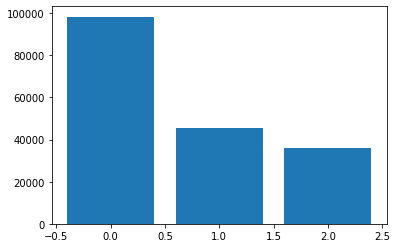

In [94]:
from collections import Counter
from matplotlib import pyplot
# summarize distribution
counter = Counter(y_sm)
for k,v in counter.items():
	per = v / len(y_sm) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [95]:
%%time
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

oversample = SMOTE()
X, y = oversample.fit_resample(X_sm, y_sm)
# summarize distribution

CPU times: total: 2min 14s
Wall time: 1min 41s


Class=1, n=98343 (33.333%)
Class=0, n=98343 (33.333%)
Class=2, n=98343 (33.333%)


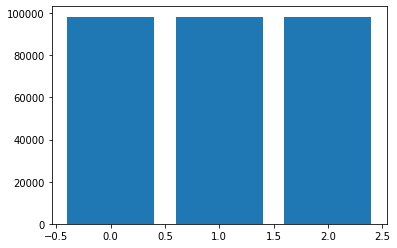

In [96]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ml = [
    #neighbors.KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LinearSVC(),
    GaussianNB(),
    MLPClassifier(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]

In [98]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score

In [99]:
%%time
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X, y)

CPU times: total: 17min 11s
Wall time: 3min 36s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=10, nthread=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

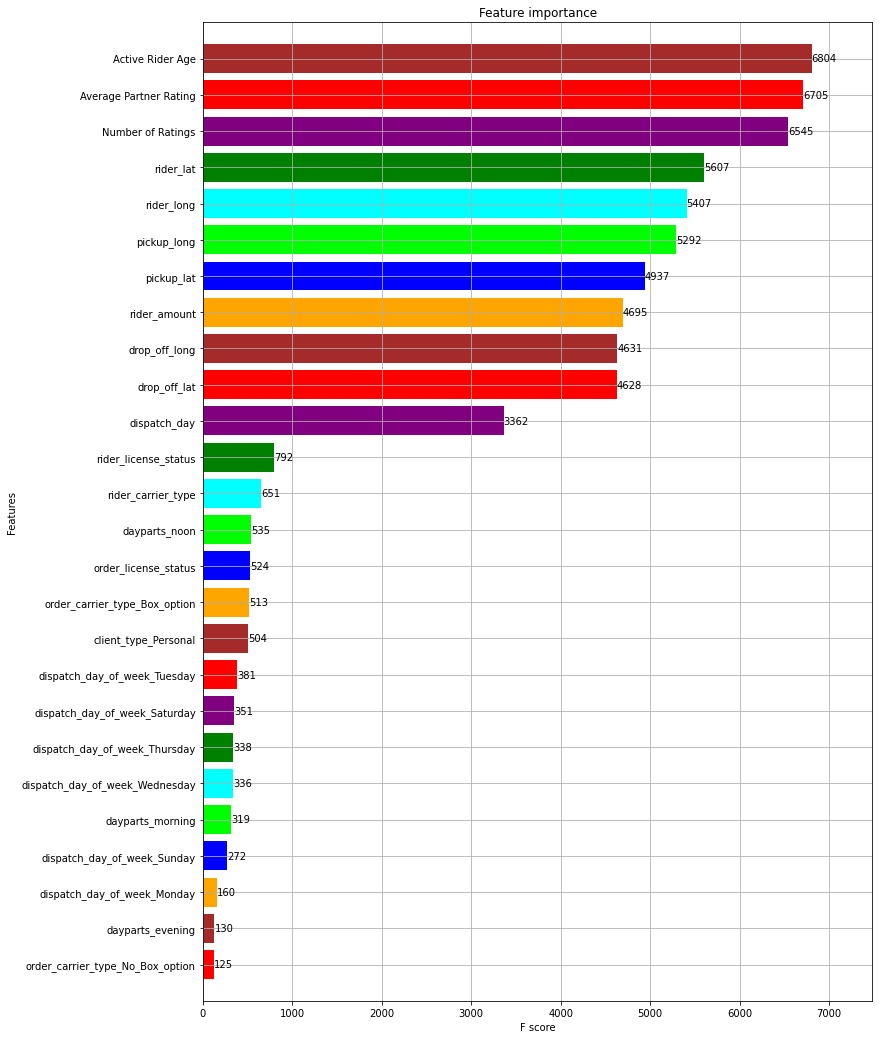

In [100]:
# plot the important features #
colors=['red','brown', 'orange','blue','lime','cyan','green','purple']
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax, color=colors)
plt.show()

## Model building

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,balanced_accuracy_score
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [188]:
%%time
def eval_model(algo ,X, y):
    # Split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=123)
    
    # Fit model
    start = time.time()
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    end = time.time()
    # Evaluate model
    name = algo.__class__.__name__
#     print(name)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    #auc = metrics.roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    duration = end - start
        
    return [name, accuracy, precision, recall, f1_score, duration]

CPU times: total: 0 ns
Wall time: 0 ns


In [189]:
#metrics.roc_auc_score??

In [190]:
%%time
results = []

for algo in ml:
    results.append(eval_model(algo, X, y))
                   
performance = pd.DataFrame(results, 
                           columns=['Name', 'Accuracy', 'Precision', 'Recall', "F1 Score", 'Run Time']
                          ).sort_values(by='F1 Score', ascending=False)
performance

CPU times: total: 31min 23s
Wall time: 24min 1s


,Name,Accuracy,Precision,Recall,F1 Score,Run Time
8,RandomForestClassifier,0.675694,0.680417,0.675694,0.675247,96.209878
7,ExtraTreesClassifier,0.656871,0.661766,0.656871,0.656774,78.056214
6,GradientBoostingClassifier,0.580834,0.583198,0.580834,0.577937,321.971894
0,DecisionTreeClassifier,0.570778,0.570230,0.570778,0.570450,6.896329
3,MLPClassifier,0.559209,0.560715,0.559209,0.555861,624.600307
5,AdaBoostClassifier,0.539256,0.538033,0.539256,0.536604,24.205123
4,RidgeClassifier,0.522817,0.527757,0.522817,0.504107,0.302099
9,LogisticRegression,0.457219,0.464290,0.457219,0.456063,13.631766
2,GaussianNB,0.410727,0.504656,0.410727,0.352410,0.466996
1,LinearSVC,0.334644,0.342313,0.334644,0.167998,272.487227


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=123)

In [145]:
X_train.shape, X_test.shape

((206520, 28), (88509, 28))

In [230]:
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [147]:
%%time
etc=etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
#train_acc=accuracy_score(x_pred, y_train)

CPU times: total: 1min 33s
Wall time: 1min 36s


In [235]:
%%time
rf=rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
#train_acc=accuracy_score(x_pred, y_train)

CPU times: total: 1min 38s
Wall time: 1min 39s


In [148]:
%%time
abc.fit(X_train, y_train)
y_pred1 = abc.predict(X_test)
#train_acc=accuracy_score(x_pred, y_train)

CPU times: total: 30.6 s
Wall time: 31.4 s


In [236]:
%%time
gbc.fit(X_train, y_train)


CPU times: total: 5min 25s
Wall time: 5min 36s


GradientBoostingClassifier()

In [237]:
y_pred2 = gbc.predict(X_test)
#train_acc=accuracy_score(x_pred, y_train)

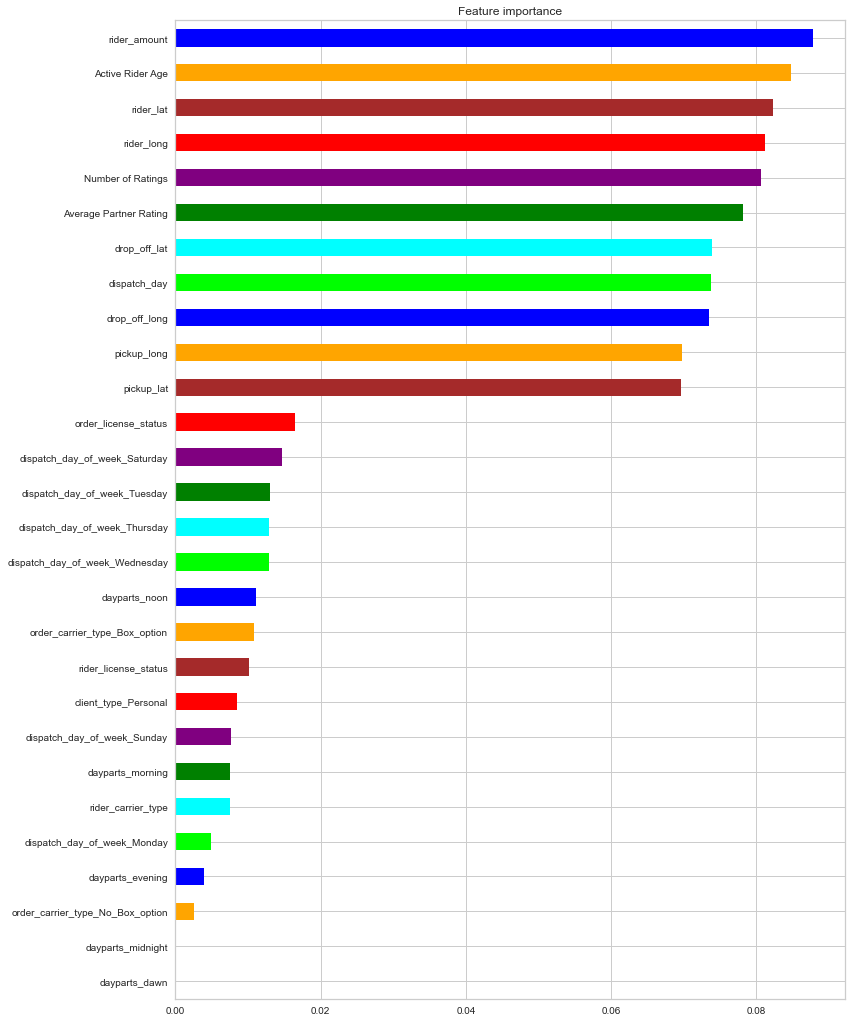

In [166]:
# plot the important features #

colors=['red','brown', 'orange','blue','lime','cyan','green','purple']
fig, ax = plt.subplots(figsize=(12,18))
feat_importances =pd.Series(etc.feature_importances_, index =X.columns)
feat_importances.sort_values().plot(kind ='barh', color =colors, ax=ax)
plt.title('Feature importance')
#etc.feature_importances_(etc, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [167]:
train_acc=accuracy_score(y_train, etc.predict(X_train))
train_acc

0.9882045322486926

In [168]:
train_acc1=accuracy_score(y_train, abc.predict(X_train))
train_acc1

0.5372699980631416

In [169]:
train_acc2=accuracy_score(y_train, gbc.predict(X_train))
train_acc2

0.5827571179546776

In [238]:
train_acc3=accuracy_score(y_train, rf.predict(X_train))
train_acc3

0.9882045322486926

In [170]:
from sklearn.metrics import accuracy_score,roc_auc_score
test_acc =accuracy_score(y_pred, y_test)
accuracy_score(y_pred, y_test)

0.6573568789614616

In [171]:
from sklearn.metrics import accuracy_score,roc_auc_score
test_acc1 =accuracy_score(y_pred1, y_test)
accuracy_score(y_pred1, y_test)

0.5392558948807465

In [172]:
from sklearn.metrics import accuracy_score,roc_auc_score
test_acc2 =accuracy_score(y_pred2, y_test)
accuracy_score(y_pred2, y_test)

0.5808335875447694

In [239]:
from sklearn.metrics import accuracy_score,roc_auc_score
test_acc3 =accuracy_score(y_pred3, y_test)
accuracy_score(y_pred3, y_test)

0.6750951880599713

In [173]:
from sklearn.metrics import accuracy_score,roc_auc_score
test_acc1 =accuracy_score(y_pred1, y_test)
accuracy_score(y_pred1, y_test)

0.5392558948807465

In [240]:
#Test model using test sample
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
#create adataframe for actual and predicted y
data ={'Actual_Y': y_test,'Predicted_Y': y_pred3}
df33 =pd.DataFrame(data, columns =['Actual_Y','Predicted_Y'])
print(df33)
df33.head()

[[20401  5225  3987]
 [ 7716 17333  4609]
 [ 6120  2670 20448]]
        Actual_Y  Predicted_Y
220937         1            1
260058         2            2
84551          1            0
49375          0            0
260489         2            2
...          ...          ...
118733         0            0
149782         0            0
124975         1            1
165010         1            0
49286          1            1

[88509 rows x 2 columns]


,Actual_Y,Predicted_Y
220937,1,1
260058,2,2
84551,1,0
49375,0,0
260489,2,2


## Confusion matrix

In [241]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred3)
cm2

array([[21019,  4821,  3773],
       [ 7292, 17598,  4768],
       [ 5857,  2246, 21135]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix showing performance of a model given the true values are known')

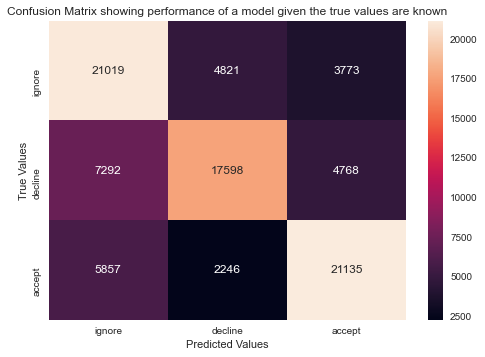

In [242]:
ax = plt.subplot()
colors =['green','blue','red','purple']
sns.heatmap(cm2, annot=True, ax = ax, fmt='d', color=colors)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.xaxis.set_ticklabels(['ignore', 'decline','accept'])
ax.yaxis.set_ticklabels(['ignore', 'decline','accept'])
ax.set_title('Confusion Matrix showing performance of a model given the true values are known')

In [243]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66     29613
           1       0.71      0.59      0.65     29658
           2       0.71      0.72      0.72     29238

    accuracy                           0.68     88509
   macro avg       0.68      0.68      0.67     88509
weighted avg       0.68      0.68      0.67     88509



In [244]:
pd.crosstab(y_test,y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,21019,4821,3773,29613
1,7292,17598,4768,29658
2,5857,2246,21135,29238
All,34168,24665,29676,88509


## `ROC` `(Receiver Operator Characteristic) as an evaluation metric`

Roc tells us how good the model is for distinguishing the given classes, in terms of the predicted instances. A typical ROC curve has the True Positive Rate on the Y-axis and False Positive Rate on X-axis.



This tells us the proportion of the churned samples that were incorrectly classified.



This tells us the proportion of the not churned samples that were incorrectly classified and are false positives.

In [245]:
from sklearn import metrics
#calculate Area under the curve for ignore
ignore_fpr, ignore_tpr, ignore_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =0)
ignore_auc =metrics.auc(ignore_fpr, ignore_tpr,)
print('area under the curve(AUC) for ignore class:',ignore_auc)

#calculate Area under the curve for decline
decline_fpr, decline_tpr, decline_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =1)
decline_auc =metrics.auc(decline_fpr, decline_tpr,)
print('area under the curve(AUC) for decline class:',decline_auc)

#calculate Area under the curve for accept
accept_fpr, accept_tpr, accept_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =2)
accept_auc =metrics.auc(accept_fpr, accept_tpr)
print('area under the curve(AUC) for accept class:',accept_auc)

area under the curve(AUC) for ignore class: 0.24239802537676713
area under the curve(AUC) for decline class: 0.4894899307257849
area under the curve(AUC) for accept class: 0.7698407011216792


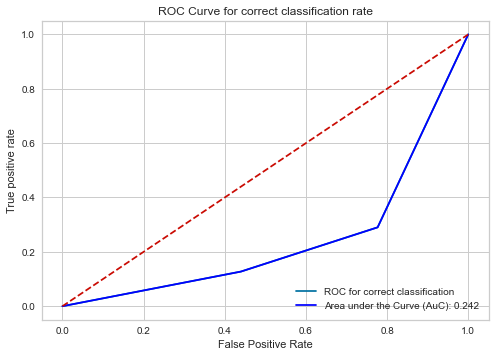

In [246]:
#plot roc curve for ignore (pos_label 0)
ignore_fpr, ignore_tpr, ignore_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =0)
ignore_auc =metrics.auc(ignore_fpr, ignore_tpr,)

#print ROC Curve
plt.plot(ignore_fpr, ignore_tpr, label='ROC for correct classification')
plt.plot(ignore_fpr, ignore_tpr, color ='blue', label ='Area under the Curve (AuC): %1.3f' % ignore_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for correct classification rate')
plt.legend(loc ='lower right')
plt.show()

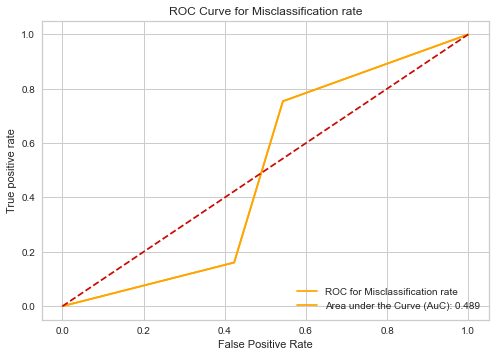

In [247]:
#plot roc curve for decline (pos_label 1)
decline_fpr, decline_tpr, decline_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =1)
declineauc =metrics.auc(decline_fpr, decline_tpr,)

#print ROC Curve
plt.plot(decline_fpr, decline_tpr, label='ROC for Misclassification rate', color ='Orange')
plt.plot(decline_fpr, decline_tpr, color ='Orange', label ='Area under the Curve (AuC): %1.3f' % decline_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Misclassification rate')
plt.legend(loc ='lower right')
plt.show()

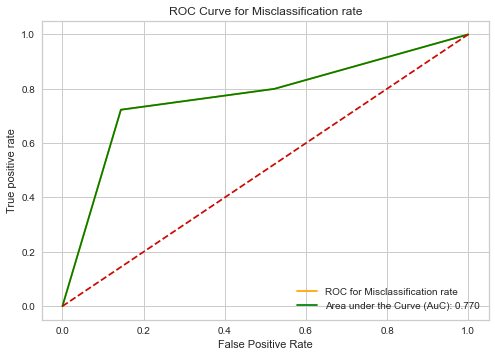

In [248]:
#plot roc curve for accept (pos_label 2)
accept_fpr, accept_tpr, accept_thresholds = metrics.roc_curve(y_test, y_pred3, pos_label =2)
accept_auc =metrics.auc(accept_fpr, accept_tpr)

#print ROC Curve
plt.plot(accept_fpr, accept_tpr, label='ROC for Misclassification rate', color ='Orange')
plt.plot(accept_fpr, accept_tpr, color ='green', label ='Area under the Curve (AuC): %1.3f' % accept_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for Misclassification rate')
plt.legend(loc ='lower right')
plt.show()

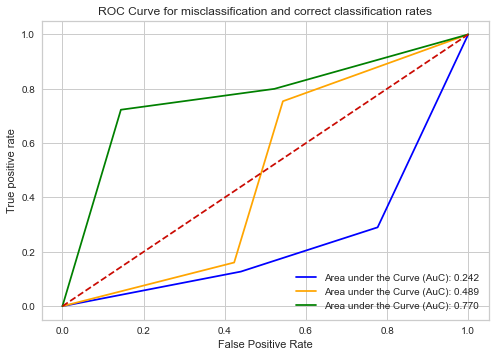

In [249]:
#plot the roc curve for all the classes
plt.plot(ignore_fpr, ignore_tpr, color ='blue', label ='Area under the Curve (AuC): %1.3f' % ignore_auc)
plt.plot(decline_fpr, decline_tpr, color ='Orange', label ='Area under the Curve (AuC): %1.3f' % decline_auc)
plt.plot(accept_fpr, accept_tpr, color ='green', label ='Area under the Curve (AuC): %1.3f' % accept_auc)
#axiss labels
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve for misclassification and correct classification rates')
plt.legend(loc ='lower right')
plt.show()

In [205]:
import pickle

In [206]:
pickle.dump(etc, open('model.pkl', 'wb'))

In [207]:
pickle_model = pickle.load(open('model.pkl', 'rb'))

In [220]:
y_pred_holdout = pickle_model.predict(X_holdout)

In [221]:
X_holdout=X_holdout.reset_index()

In [222]:
ID=X_holdout['ID']

In [223]:


y_pred_holdout
#print(confusion_matrix(y_pred_holdout))
#create adataframe for actual and predicted y
data ={'ID':X_holdout['ID'],'Predicted_Y': y_pred_holdout}
df44 =pd.DataFrame(data, columns =['ID','Predicted_Y'])
print(df44)
df44.head()

                  ID  Predicted_Y
0      ID_3B4D2Q2DSI            0
1      ID_GNX24MLKHO            0
2      ID_PJ5FDNIOB3            0
3      ID_EMW71WZ4BI            2
4      ID_UEE9UX7ED5            2
...              ...          ...
76786  ID_XUJLXPVRH9            0
76787  ID_KNLIQW5H1G            2
76788  ID_34DQX20NHA            0
76789  ID_6E8CD1JAZK            0
76790  ID_KNMX8XV5H2            2

[76791 rows x 2 columns]


,ID,Predicted_Y
0,ID_3B4D2Q2DSI,0
1,ID_GNX24MLKHO,0
2,ID_PJ5FDNIOB3,0
3,ID_EMW71WZ4BI,2
4,ID_UEE9UX7ED5,2


In [224]:
df44.to_csv('BikespredsSubmission.csv')

In [225]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [226]:
%%time
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# define the reference model
model=GradientBoostingClassifier()
#model = RandomForestClassifier(n_estimators=100)
#model=ExtraTreesClassifier()
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.580 (0.002)
CPU times: total: 828 ms
Wall time: 27min 1s


In [227]:
scores

array([0.57622954, 0.58014439, 0.58141545, 0.58133071, 0.57805271,
       0.57944955, 0.57841575, 0.57987323, 0.57994102, 0.58137446,
       0.5810765 , 0.58205945, 0.57960207, 0.58004271, 0.57745954])

In [228]:
%%time
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# define the reference model
#model=GradientBoostingClassifier()
model = RandomForestClassifier(n_estimators=100)
#model=ExtraTreesClassifier()
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.680 (0.002)
CPU times: total: 797 ms
Wall time: 9min 7s


In [229]:
scores

array([0.68004949, 0.67928685, 0.68091381, 0.67718537, 0.67738327,
       0.68032065, 0.67772769, 0.68103244, 0.67625326, 0.6842132 ,
       0.67938854, 0.67879538, 0.68221876, 0.68220181, 0.67782391])